#**PROJECT TITLE: SALARY PREDICTION**

##**Problem Statement**

Accurately predicting salaries is essential for various applications, including HR management, employee negotiations, talent acquisition, and economic analysis. It enables organizations to ensure fair compensation, attract top talent, understand market trends, and address wage disparities.

##**Project Aim and Applications**

The aim of this project is to develop a robust and accurate salary predicition model that can be applied in various domains.

Potential Applications include:

*   **HR Analytics:** Supporting HR departments in making informed decisions about compensation and talent management.
*   **Career Guidance:** Providing individuals with insights into potential salary ranges based on their qualifications and experiences.
*   **Policy Making:** Informing policymakers about factors affecting wage inequality and develop strategies for equitable compensation.
*   **Research:** Contributing to academic research on salary determination and labor economics.

##**Project Overview**

This project entails a comprehensive analysis of a dataset containing individual's salary based on their demographic and professional attributes. The key tasks involve leveraging Regression Analysis and Machine Learning techniques to analyze the relationships between these factors and salary.

##**Dataset Description**

The dataset contains the following features:

*   **Unnamed 0:** Index column
*   **Age:** Age of the employee
*   **Education Level:** Education level of the employee
*   **Years of Experience:** Years of Experience of the employee
*   **Salary:** Salary of the employee (target variable)
*   **Country:** Country of the employee
*   **Race:** Race of the employee



In [1]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

##**1. Data Loading and Investigation**
--------------------------------------------------------------------------------

In [3]:
# Load dataset and display first few rows

data = pd.read_csv('/content/drive/MyDrive/iiAfricaCapstoneProject/Salary_Data_Based_country_and_race.csv')
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
# Gather basic info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [5]:
# size of dataset
data.shape

(6704, 9)

In [6]:
# Descriptive statistics

data.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


##**2. Data Cleaning**

--------------------------------------------------------------------------------



####**2.1 Checking and Handling Missing Values**

In [7]:
# check missing values

data.isnull().sum()

,0
Unnamed: 0,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5
Country,0
Race,0


In [8]:
# Handling missing values
data.dropna(axis=0, inplace =True)

data.isnull().any(axis=1).sum()

0

In [9]:
data.shape

(6698, 9)

####**2.2 Converting Columns to Correct Data Type**

In [10]:
# convert Age column from float to int
data['Age'] = data['Age'].astype(int)
data['Age'].dtype

dtype('int64')

####**2.3 Renaming Features and Dropping Irrelevant Columns**

In [11]:
# Rename columns
data = data.rename(columns={'Education Level':'EducationLevel',
                        'Job Title':'JobTitle',
                        'Years of Experience':'YearsOfExperience'})
# Drop the unnamed column
data = data.drop('Unnamed: 0', axis=1)

# Display updated columns
data.columns

Index(['Age', 'Gender', 'EducationLevel', 'JobTitle', 'YearsOfExperience',
       'Salary', 'Country', 'Race'],
      dtype='object')

####**2.4 Analyzing and Handling Distribution of Columns**

In [12]:
# Distribution of gender column

data['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013
Other,14


In [13]:
# Distribution of education levels column

data['EducationLevel'].value_counts()

,count
EducationLevel,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [14]:
# Rename values in the Education level column for uniformity

data['EducationLevel'] = data['EducationLevel'].replace({'Bachelor\'s Degree':'BachelorDegree',
                                                     'Master\'s Degree':'MasterDegree',
                                                     'High School':'HighSchool',
                                                     'Bachelor\'s':'BachelorDegree',
                                                     'Master\'s':'MasterDegree',
                                                     'phD':'PhD'})

data['EducationLevel'].value_counts()

,count
EducationLevel,
BachelorDegree,3021
MasterDegree,1860
PhD,1369
HighSchool,448


In [15]:
# Distribution of Country column

data['Country'].value_counts()

,count
Country,
USA,1359
China,1343
Australia,1336
UK,1335
Canada,1325


In [16]:
# Distribution of Race column

data['Race'].value_counts()

,count
Race,
White,1962
Asian,1603
Korean,457
Australian,452
Chinese,444
Black,437
African American,354
Mixed,334
Welsh,333


In [17]:
data['JobTitle'].value_counts()

,count
JobTitle,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


####**2.5 Identifying and Handling Duplicates**

In [18]:
# check for duplicates

duplicates = data.duplicated().sum()
# Percentage of duplicated data
percentage = data.duplicated().sum() / data.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

1536 rows contain duplicates amounting to 22.93% of the total data.


In [19]:
# Inspect some rows containing duplicates as needed

duplicates = data[data.duplicated(keep=False)]

# Sort the duplicates by the columns you want to consider for duplication
duplicates = duplicates.sort_values(by=['Age', 'Gender', 'EducationLevel', 'JobTitle', 'YearsOfExperience',
       'Salary', 'Country', 'Race'])

duplicates.head(20)

,Age,Gender,EducationLevel,JobTitle,YearsOfExperience,Salary,Country,Race
5057,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,Australia,Australian
5109,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,Australia,Australian
4962,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,Australia,White
5018,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,Australia,White
5044,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,Australia,White
4949,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,China,Chinese
5122,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,China,Chinese
4988,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,China,Korean
5070,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,China,Korean
4884,21,Female,HighSchool,Junior Sales Representative,0.0,25000.0,China,White


In [20]:
data.shape

(6698, 8)

####**2.6 Outlier Detection and Handling**

**Outlier Identification using Visual Method (box plots) and Statistical Method (Interquartile Range)**

**Boxplot**

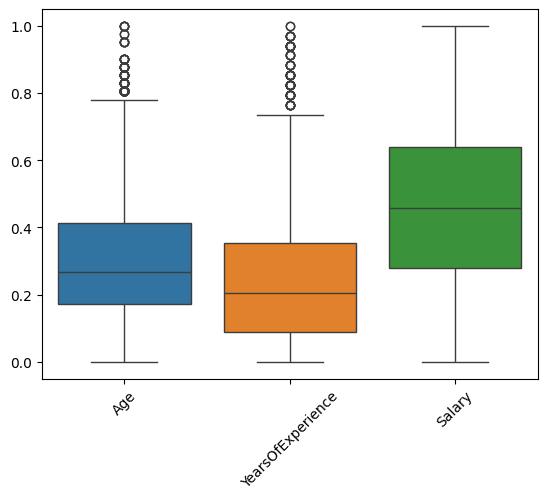

In [21]:
# Create a boxplot to visualize distribution of all numeric variables and detect any outliers

# select numeric columns
num_columns = data[['Age','YearsOfExperience', 'Salary']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create df with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

**Interquartile Range (IQR)**

In [22]:
# Determine the number of rows containing outliers in Years of Experience column that needs to be addressed

# Compute the 25th percentile value in `X_n == YearsOfExperience`
percentile25 = data['YearsOfExperience'].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = data['YearsOfExperience'].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = data[(data['YearsOfExperience'] > upper_limit) | (data['YearsOfExperience'] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in `YearsOfExperience`:", len(outliers))

Lower limit: -10.5
Upper limit: 25.5
Number of rows in the data containing outliers in `YearsOfExperience`: 75


In [23]:
# Determine the number of rows containing outliers in Age column that needs to be addressed

# Compute the 25th percentile value in `X_n == Age`
percentile25 = data['Age'].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = data['Age'].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = data[(data['Age'] > upper_limit) | (data['Age'] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in `Age`:", len(outliers))

Lower limit: 13.0
Upper limit: 53.0
Number of rows in the data containing outliers in `Age`: 123


Reassigning Outliers using Capping and Floor and Ceiling Method



In [24]:
# Define capping values for `Years of Experience`
lower_cap = data['YearsOfExperience'].quantile(0.05)
upper_cap = data['YearsOfExperience'].quantile(0.95)

# cap outliers
data['YearsOfExperience'] = np.where(data['YearsOfExperience'] < lower_cap, lower_cap, data['YearsOfExperience'] )
data['YearsOfExperience'] = np.where(data['YearsOfExperience'] > upper_cap, upper_cap, data['YearsOfExperience'] )

In [25]:
# floor and ceiling method for Age Column

# Calculate 5th percentile
fifth_percentile = np.percentile(data['Age'], 5)

# Calculate 95th percentile
ninetyfifth_percentile = np.percentile(data['Age'], 95)

# Apply lambda function to replace outliers with thresholds defined above
data['Age'] = (data['Age']
                       .apply(lambda x: (fifth_percentile
                                         if x < fifth_percentile
                                         else ninetyfifth_percentile
                                         if x > ninetyfifth_percentile
                                         else x))
)

In [26]:
data_cleaned = data.copy()

data_cleaned.shape

(6698, 8)

**Boxplot after Outlier Treatment**

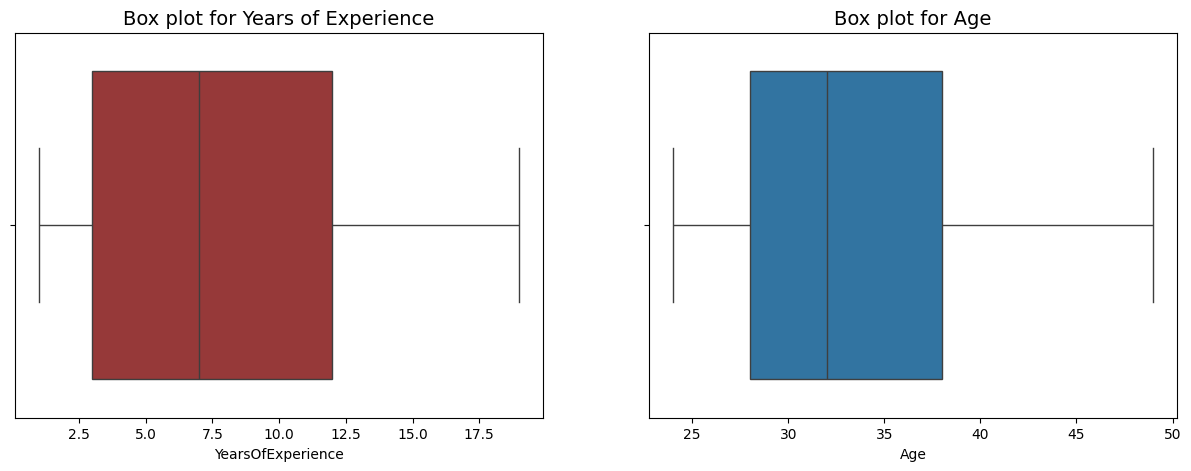

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

# Create boxplot of Years of Experience
sns.boxplot(
    data=data_cleaned,
    x='YearsOfExperience',
    color='brown',
    ax=ax[0]
)
ax[0].set_title('Box plot for Years of Experience', fontsize='14')

# Create boxplot of Age
sns.boxplot(
    data=data_cleaned,
    x='Age',
    ax=ax[1]
)
ax[1].set_title('Box plot for Age', fontsize='14')

# Display the plots
plt.show()

##**3. Data Visualization**
--------------------------------------------------------------------------------

#####**3.1 Distribution**

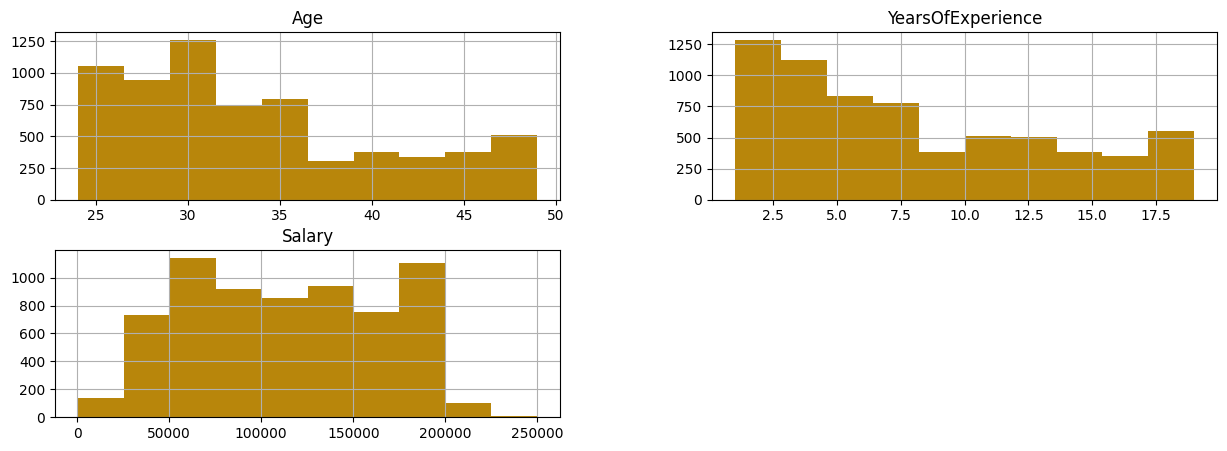

In [28]:
data_cleaned.hist(figsize=(15,5), color='darkgoldenrod')
plt.ylabel('Frequency')
plt.show()

#####**3.2 Correlation Heatmap**

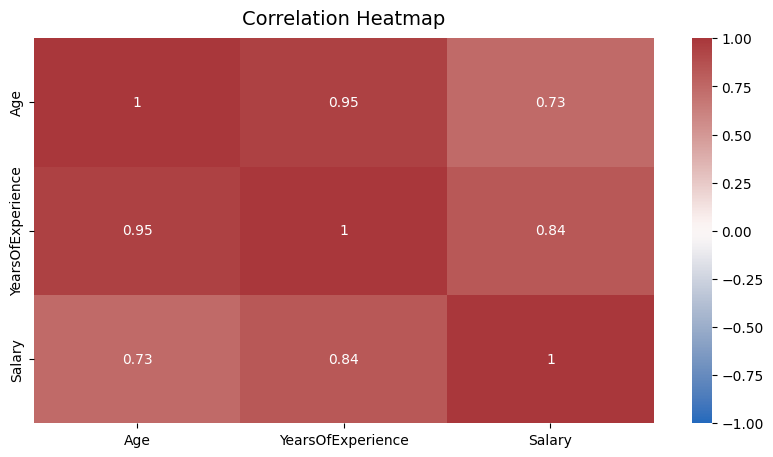

In [29]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(
    data= data_cleaned.select_dtypes(include='number').corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

#####**3.3 Scatterplots**

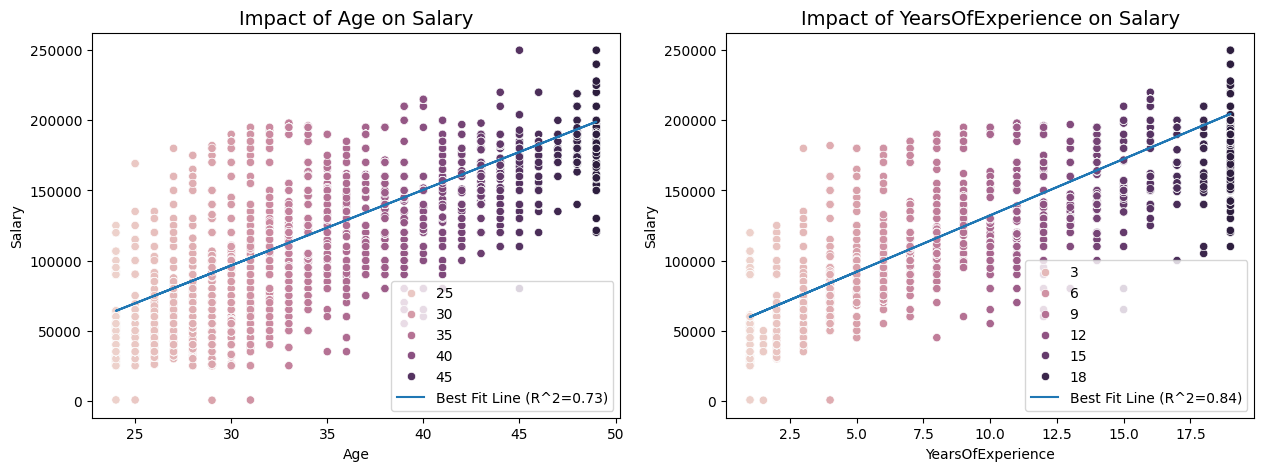

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Function to add scatterplot and best-fitting line
def add_scatter_and_line(data, x_col, y_col, hue_col, ax):
    sns.scatterplot(
        data=data,
        x=x_col,
        y=y_col,
        hue=hue_col,
        #alpha=0.6,
        ax=ax
    )

    # Calculate linear regression parameters
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[x_col], data[y_col])

    # Create best-fitting line equation
    line_x = data[x_col].values
    line_y = slope * line_x + intercept

    # Add best-fitting line to the plot (adjust color based on palette)
    ax.plot(line_x, line_y, label=f"Best Fit Line (R^2={r_value:.2f})")

    ax.set_title(f"Impact of {x_col} on Salary", fontsize=14)
    ax.legend()  # Include legend if using hue_col

# Create scatterplots with best-fitting lines
add_scatter_and_line(data_cleaned, 'Age', 'Salary', 'Age', ax[0],)
add_scatter_and_line(data_cleaned, 'YearsOfExperience', 'Salary', 'YearsOfExperience', ax[1])

# Display the plots
plt.show()

#####**3.4 Bar Chart Distribution for Categorical Features**

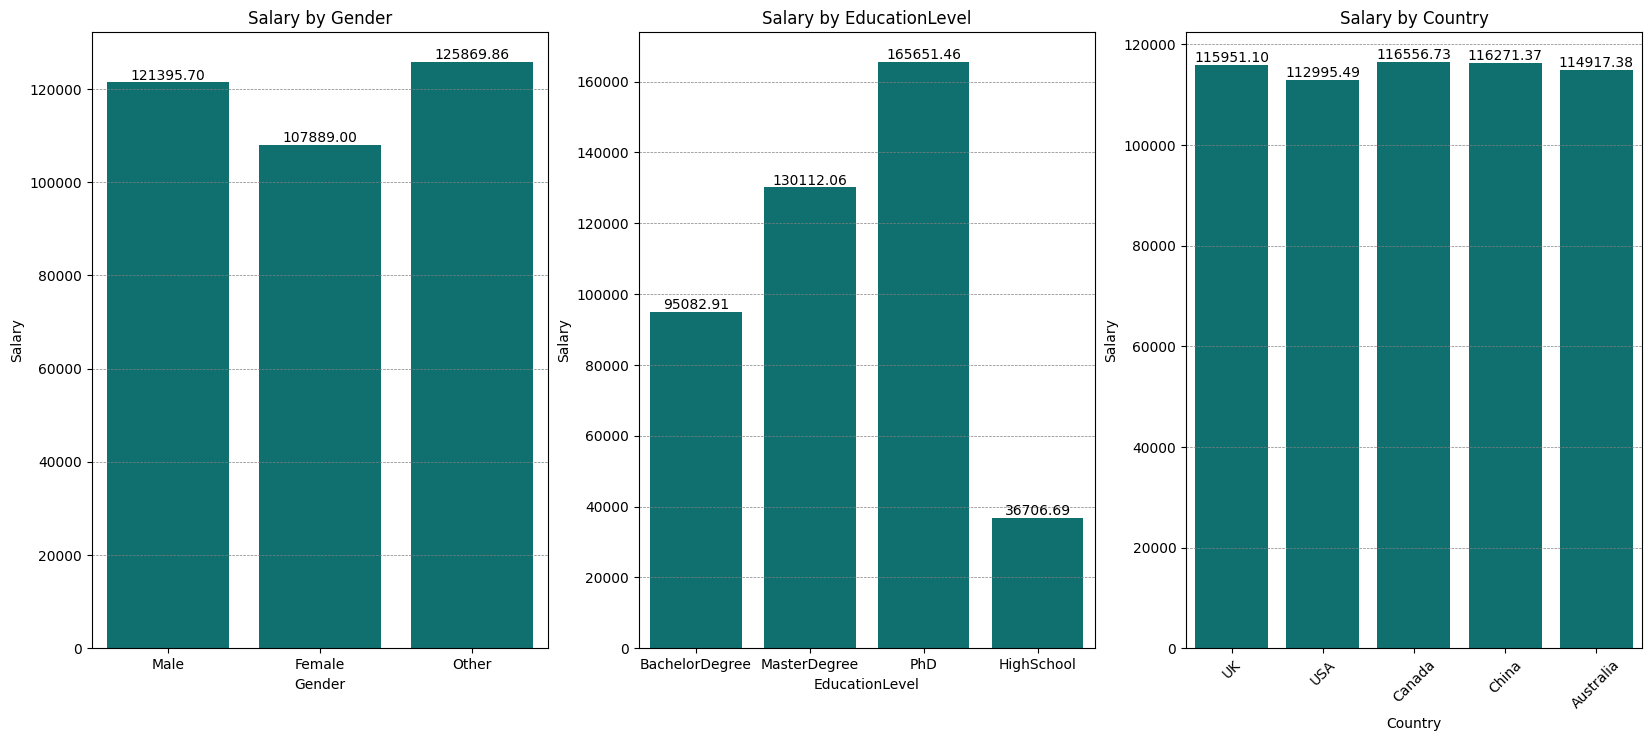

In [31]:
# Define categorical features
categorical_features = ['Gender', 'EducationLevel', 'Country']

# Create subplots
fig, axes = plt.subplots(1, ncols=len(categorical_features), figsize = (20,8))

for i, feature in enumerate(categorical_features):
  sns.barplot(x=feature, y='Salary', data=data_cleaned, ax=axes[i], color='teal', errorbar=None)
  axes[i].set_title(f'Salary by {feature}')
  # Add values on top of bars
  for p in axes[i].patches:
      axes[i].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

  plt.xticks(rotation=45)
   # Add gridlines
  axes[i].grid(color='grey', linestyle='--', linewidth=0.5, which='both', axis='y')




plt.show()

#####**3.6 Pie Chart Distribution for Categorical Features**

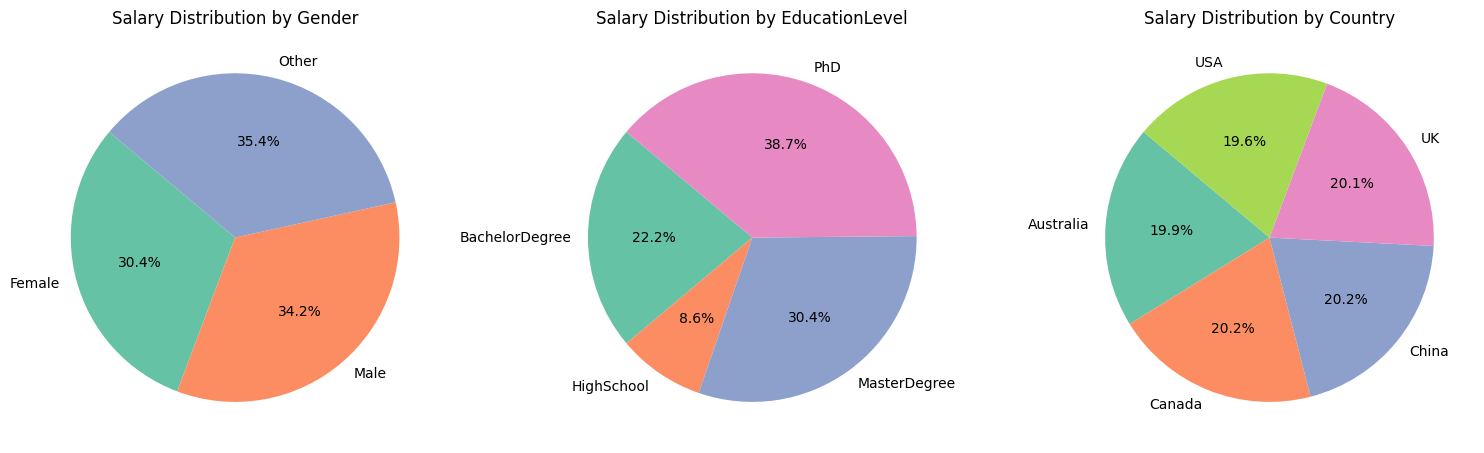

In [32]:
# Create subplots
fig, axes = plt.subplots(1, ncols=len(categorical_features), figsize=(15, 5))

# Iterate through categorical features and create pie charts
for i, feature in enumerate(categorical_features):
    # Group data by the categorical feature and calculate average salary
    grouped_data = data_cleaned.groupby(feature)['Salary'].mean()

    # Create pie chart
    # Create pie chart
    axes[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

    # Set title
    axes[i].set_title(f'Salary Distribution by {feature}')

plt.tight_layout()
plt.show()

##**4. Hypothesis Testing**
--------------------------------------------------------------------------------

####**4.1 Simple Linear Regression**

####**4.1.1 Impact of Education Level on Salary**

**Null Hypothesis H0:** There is no difference in mean salary across different education levels

**Alternative Hypothesis H1:** There is a difference in mean salary across different education levels

In [33]:
# Perform ANOVA
model = ols('Salary ~ C(EducationLevel)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (uncover differences between the education levels)
tukey_results = pairwise_tukeyhsd(endog=data_cleaned['Salary'], groups=data_cleaned['EducationLevel'], alpha=0.05)
print(tukey_results)

                         sum_sq      df            F  PR(>F)
C(EducationLevel)  7.880887e+12     3.0  1630.939353     0.0
Residual           1.078206e+13  6694.0          NaN     NaN
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------------------
BachelorDegree   HighSchool -58376.2144   0.0 -63597.4627 -53154.9661   True
BachelorDegree MasterDegree  35029.1478   0.0  31989.5989  38068.6967   True
BachelorDegree          PhD  70568.5494   0.0  67208.5303  73928.5684   True
    HighSchool MasterDegree  93405.3623   0.0  87977.7478  98832.9767   True
    HighSchool          PhD 128944.7638   0.0 123331.3986  134558.129   True
  MasterDegree          PhD  35539.4015   0.0  31866.8966  39211.9065   True
----------------------------------------------------------------------------


* Sum of squares is significant indicating that education level contributes
substantially to salary variation.

* The F-statistic is extremely high suggesting a stong difference in mean salary across different education levels.

* The p-value is zero (less than 0.05) which shows high significance.
This means we reject the null hypothesis and conclude that there is a significant difference in mean salary across different education levels.

Based on the Post-hoc test output, there is a significant difference in mean salary between all pairs of education levels. The largest difference in mean salary is between High School and PhD.

####**4.1.2. Impact of Experience on Salary**

**Null Hypothesis H0:** There is no correlation between year of experience and salary

**Alternative Hypothesis H1:** There is a positive correlation between year of experience and salary


In [34]:
# Calculate the Pearson correlation coefficient and p-value

corr_coef, p_value = stats.pearsonr(data_cleaned['YearsOfExperience'], data_cleaned['Salary'])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)

Correlation coefficient: 0.8355165636739331
P-value: 0.0


In [35]:
# Create a linear regression model
model = sm.OLS(data_cleaned['Salary'], sm.add_constant(data_cleaned['YearsOfExperience'])).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 1.548e+04
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:46:08   Log-Likelihood:                -78327.
No. Observations:                6698   AIC:                         1.567e+05
Df Residuals:                    6696   BIC:                         1.567e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.182e+04    621.38

The correlation coefficient indicate a strong positive correlation between years of experience and salary.

The p-value of zero which is less than the significance level of 0.05 suggests that the correlation is statistically significant.

This means we can reject the null hypothesis and conclude there is a significant positive relationship between years of experience and salary.

####**4.1.3. Impact of Gender on Salary**

**Null Hypothesis H0:** There is no difference in mean salary between genders

**Alternative Hypothesis H1:** There is a difference in mean salary between genders

In [36]:
# Perform ANOVA
model = ols('Salary ~ C(Gender)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey HSD)
tukey_results = pairwise_tukeyhsd(endog=data_cleaned['Salary'], groups=data_cleaned['Gender'], alpha=0.05)
print(tukey_results)

                 sum_sq      df          F        PR(>F)
C(Gender)  3.034465e+11     2.0  55.327602  1.472103e-24
Residual   1.835950e+13  6695.0        NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
Female   Male  13506.699    0.0   10488.968 16524.4299   True
Female  Other 17980.8585 0.4055 -14904.0537 50865.7706  False
  Male  Other  4474.1595 0.9454  -28397.119  37345.438  False
-------------------------------------------------------------


####**4.1.4 Impact of Country on Salary**

**Null Hypothesis H0:** There is no difference in mean salary across different countries

**Alternative Hypothesis H1:** There is a difference in mean salary across different countries

In [37]:
# Perform ANOVA
model = ols('Salary ~ C(Country)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test (Tukey HSD)
tukey_results = pairwise_tukeyhsd(endog=data_cleaned['Salary'], groups=data_cleaned['Country'], alpha=0.05)
print(tukey_results)

                  sum_sq      df         F    PR(>F)
C(Country)  1.133303e+10     4.0  1.016695  0.397127
Residual    1.865161e+13  6693.0       NaN       NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1  group2  meandiff  p-adj    lower      upper   reject
--------------------------------------------------------------
Australia Canada  1639.3503 0.9304 -3945.1713 7223.8719  False
Australia  China  1353.9913 0.9641 -4211.7091 6919.6917  False
Australia     UK  1033.7186 0.9868 -4540.2919 6607.7292  False
Australia    USA -1921.8946 0.8793 -7471.2321 3627.4428  False
   Canada  China   -285.359 0.9999 -5862.6291  5291.911  False
   Canada     UK  -605.6317 0.9983 -6191.1947 4979.9313  False
   Canada    USA  -3561.245 0.4049 -9122.1861 1999.6961  False
    China     UK  -320.2727 0.9999  -5887.018 5246.4727  False
    China    USA -3275.8859 0.4891 -8817.9258 2266.1539  False
       UK    USA -2955.6133 0.5933 -8505.9987 2594.7721  False
----------------------

The results indicate that there is no significant differences in mean salary across the countries in our analysis.

The p-value and all the p-adjusted values are greater than the usual signficance level of 0.05.

####**4.1.5. Impact of Job Title on Salary**

**Null Hypothesis H0:** There is no difference in mean salary across different job titles

**Alternative Hypothesis H1:** There is a difference in mean salary across different job titles

In [38]:
# Perform ANOVA
model = ols('Salary ~ C(JobTitle)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq      df         F  PR(>F)
C(JobTitle)  1.239460e+13   190.0  67.71845     0.0
Residual     6.268344e+12  6507.0       NaN     NaN


The significant sum of squares and extremely low p-value (0.0) indicate that there are significant differences in mean salary across different job titles. We reject the null hypothesis.

####**4.1.6. Impact of Race on Salary**

**Null Hypothesis H0:** There is no difference in mean salary across different racial groups

**Alternative Hypothesis H1:** There is a difference in mean salary across different racial groups

In [39]:
# Perform ANOVA

model = ols('Salary ~ C(Race)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F   PR(>F)
C(Race)   3.458277e+10     9.0  1.379554  0.19112
Residual  1.862836e+13  6688.0       NaN      NaN


The F-statistic is 0.9431 and the p-value is 0.486 which indicates that there is no significant difference in mean salary across different racial groups. We fail to reject the null hypothesis.

In [40]:
data_cleaned['JobTitle'].value_counts()

,count
JobTitle,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


###**4.2 Multiple Linear Regression**

#####**4.2.1 Grouping Job Title to Categories as per Similarities**

In [41]:
# Define the categories and corresponding job titles

job_categories = {
    'Engineering': ['Software Engineer', 'Software Developer', 'Senior Engineer',
                    'Network Engineer', 'Junior Software Engineer', 'Senior Software Engineer',
                    'Full Stack Engineer', 'Front end Developer', 'Back end Developer', 'Software Architect',
                    'Technical Support Specialist', 'Developer', 'IT Support', 'Junior Developer', 'Web Developer',
                    'Senior Data Engineer', 'Senior Project Engineer', 'Junior Software Developer',
                    'Front End Developer'],

    'Management': ['Senior Manager', 'Product Manager', 'Sales Manager', 'Operations Manager',
                   'Marketing Manager', 'Financial Manager', 'Project Manager',
                   'Business Development Manager', 'Customer Service Manager', 'IT Manager',
                   'Supply Chain Manager', 'VP of Operations', 'VP of Finance', 'Director',
                   'Director of Operations', 'Director of Marketing', 'Director of Product Management',
                   'Senior Project Manager', 'Senior Operations Manager', 'Chief Technology Officer',
                   'CEO', 'Director of Engineering', 'Software Engineer Manager', 'Director of Data Science',
                   'Director of HR', 'Senior Financial Manager', 'Senior IT Project Manager',
                   'Senior Marketing Manager', 'Senior Marketing Director', 'Senior IT Consultant',
                   'Director of Business Development', 'Senior Operations Coordinator',
                   'Senior Financial Advisor', 'Senior Marketing Coordinator', 'Director of Finance', 'Senior Sales Manager',
                   'Digital Marketing Manager', 'Senior Financial Manager', 'Content Marketing Manager', 'Finance Manager'],

    'Marketing & Sales': ['Marketing Analyst', 'Marketing Coordinator', 'Social Media Specialist',
                  'Digital Marketing Specialist', 'Marketing Specialist', 'Senior Marketing Coordinator',
                  'Senior Marketing Specialist', 'Junior Marketing Coordinator', 'Junior Social Media Specialist', 'Junior Advertising Coordinator',
                  'Junior Marketing Specialist', 'Junior Product Manager', 'Junior Sales Associate',
                  'Marketing Director', 'Social Media Manager', 'Social Media Man', 'Sales Associate',
                  'Sales Director', 'Sales Executive', 'Sales Representative', 'Senior Sales Representative',
                  'Account Manager', 'Senior Account Manager', 'Senior Account Executive', 'Junior Account Manager',
              'Junior Sales Associate', 'Sales Director'],

        'HR': ['HR Generalist', 'HR Manager', 'Recruiter', 'Senior HR Specialist',
                        'Senior Human Resources Manager', 'Human Resources Director',
                        'Senior Human Resources Coordinator', 'Junior HR Coordinator',
                        'Senior Human Resources Specialist', 'Human Resources Manager',
                        'HR Coordinator', 'Juniour HR Generalist', 'Juniour HR Coordinator',
                        'Junior HR Specialist', 'HR Specialist'],

    'Data': ['Data Analyst', 'Data Scientist', 'Business Intelligence Analyst',
             'Senior Data Analyst', 'Senior Data Scientist', 'Junior Data Scientist',
             'Data Engineer', 'Junior Data Analyst', 'Business Analyst', 'Senior Operations Analyst'],

    'Finance & dministration': ['Financial Analyst', 'Senior Financial Analyst', 'Junior Financial Advisor',
                'Financial Advisor', 'Senior Accountant', 'Senior Financial Advisor', 'Junior Accountant',
                'Senior Financial Consultant', 'Administrative Assistant', 'Receptionist',
                'Help Desk Analyst', 'Customer Service Rep', 'Customer Success Rep',
                  'Customer Service Representative', 'Customer Service Manager'],

    'Research & Development': ['Senior Scientist', 'Research Scientist', 'Principal Scientist',
                                'Senior Researcher', 'Junior Research Scientist'],

    'Creative & Design': ['Graphic Designer', 'UX Designer', 'UX Researcher', 'Junior Designer',
                          'Junior UX Designer', 'Creative Director', 'Junior Copywriter', 'Senior UX Designer',
                          'Product Designer'],
}


# Create a flattened dictionary for faster lookups
job_titles_to_categories = {title: category for category, titles in job_categories.items() for title in titles}

def categorize_job(title):
    category = job_titles_to_categories.get(title)
    return category if category else 'Other'  # Assign 'Other' if no category is found

# Apply the categorization
data_cleaned['JobCategory'] = data_cleaned['JobTitle'].apply(categorize_job)

data_cleaned[['JobTitle','JobCategory']].head(10)

,JobTitle,JobCategory
0,Software Engineer,Engineering
1,Data Analyst,Data
2,Senior Manager,Management
3,Sales Associate,Marketing & Sales
4,Director,Management
5,Marketing Analyst,Marketing & Sales
6,Product Manager,Management
7,Sales Manager,Management
8,Marketing Coordinator,Marketing & Sales
9,Senior Scientist,Research & Development


In [42]:

data_cleaned['JobCategory'].value_counts()

,count
JobCategory,
Engineering,2235
Management,1672
Data,911
Marketing & Sales,767
Other,609
HR,197
Finance & dministration,126
Creative & Design,106
Research & Development,75


#####**4.2.2 OLS Model for Multiple Regression**

In [43]:
# Define the formula

formula = 'Salary ~ Age + Gender + EducationLevel + JobCategory + YearsOfExperience + Country + Race'

# Fit the model
model = ols(formula=formula, data=data_cleaned).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     955.0
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:46:11   Log-Likelihood:                -76942.
No. Observations:                6698   AIC:                         1.539e+05
Df Residuals:                    6669   BIC:                         1.541e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

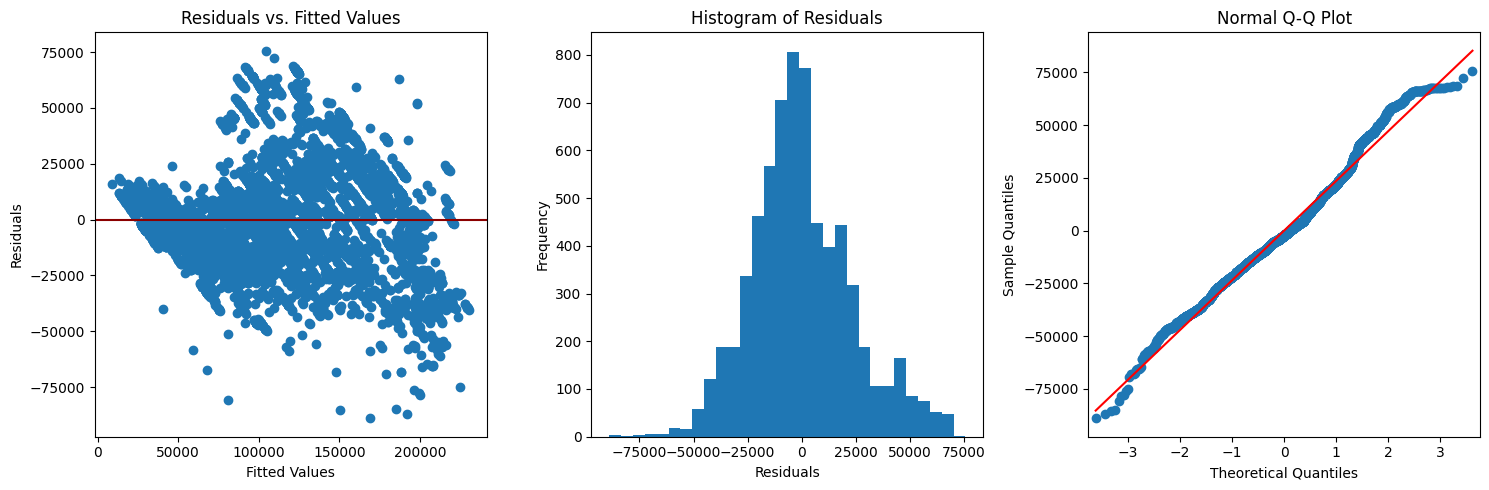

In [44]:
# Analyzing residual plots of the model

residuals = model.resid

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Residuals vs. Fitted Values
axes[0].scatter(model.fittedvalues, residuals)
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Fitted Values")
# Add a horizontal line at y=0
axes[0].axhline(0, color='darkred')

# Histogram of Residuals
axes[1].hist(residuals, bins=30)
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# Normal Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[2])
axes[2].set_xlabel("Theoretical Quantiles")
axes[2].set_ylabel("Sample Quantiles")
axes[2].set_title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

#####**4.2.3 Checking Heteroscedasticity**

In [45]:
fitted_values = model.fittedvalues

# Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan test:")
print(bp_test)

# White test
white_test = sm.stats.diagnostic.het_white(residuals, model.model.exog)
print("White test:")
print(white_test)

Breusch-Pagan test:
(1025.5275381423946, 5.692455079563751e-198, 43.06035606833536, 5.907549212660426e-216)
White test:
(1757.6780262014765, 4.1700657920548746e-212, 8.153762876441087, 7.187664418266975e-256)


Breusch-Pagan Test:

    F-statistic: 565.2016
    p-value: 1.095e-107
    Chi-square: 33.2756
    p-value: 1.908e-114

White Test:

    F-statistic: 1148.1490
    p-value: 2.322e-171
    Lagrange multiplier: 12.8951
    p-value: 3.886e-198

Interpretation:

Both the Breusch-Pagan test and the White test have very low p-values (significantly less than 0.05). This strongly suggests the presence of heteroscedasticity in our regression model. Heteroscedasticity means that the variance of the residuals is not constant.

Implications:

    Inaccurate standard errors: Heteroscedasticity can lead to biased standard errors, affecting the reliability of hypothesis tests and confidence intervals.
    Inefficient estimates: The least squares estimates might not be as efficient as they could be.

#####**4.2.4 Addressing Heteroscedasticity using Log transformation on Salary**

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     846.0
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        06:46:14   Log-Likelihood:                -590.13
No. Observations:                6698   AIC:                             1238.
Df Residuals:                    6669   BIC:                             1436.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

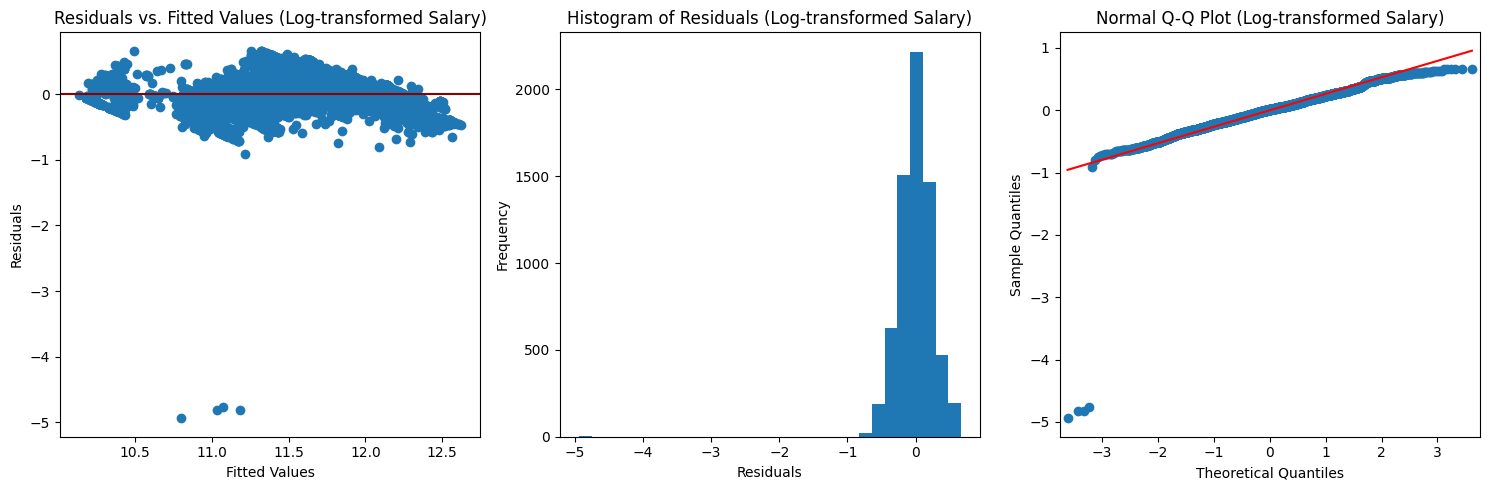

In [46]:
data_cleaned['LogSalary'] = np.log(data_cleaned['Salary'])

formula = 'LogSalary ~ Age + Gender + EducationLevel + JobCategory + YearsOfExperience + Country + Race'

# Fit the model
model_log = ols(formula=formula, data=data_cleaned).fit()

# Print the model summary
print(model_log.summary())


# Analyzing residual plots of the model using log transformation

residuals = model_log.resid

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Residuals vs. Fitted Values
axes[0].scatter(model_log.fittedvalues, residuals)
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Fitted Values (Log-transformed Salary)")
# Add a horizontal line at y=0
axes[0].axhline(0, color='darkred')

# Histogram of Residuals
axes[1].hist(residuals, bins=30)
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (Log-transformed Salary)")

# Normal Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[2])
axes[2].set_xlabel("Theoretical Quantiles")
axes[2].set_ylabel("Sample Quantiles")
axes[2].set_title("Normal Q-Q Plot (Log-transformed Salary)")

plt.tight_layout()
plt.show()

#####**4.2.5 Multicollinearity Check**

Using the variance inflation factor to detect multicollinearity

In [47]:
# Create a subset of the data with the continuous independent variables.
X = data_cleaned[["YearsOfExperience",'Age']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
YearsOfExperience,6.252846
Age,6.252846


#####**4.2.6 Handling Multicollinearity (Combining Features)**

In [48]:
# Feature Combination
data_cleaned['ExperiencePerAge'] = data_cleaned['YearsOfExperience'] / data_cleaned['Age']
data_cleaned['ExperiencePerAge'].value_counts()


,count
ExperiencePerAge,
0.041667,327
0.333333,239
0.387755,225
0.166667,210
0.137931,192
...,...
0.060000,1
0.421053,1
0.255814,1


In [49]:
# Calculate the Pearson correlation coefficient and p-value

corr_coef, p_value = stats.pearsonr(data_cleaned['ExperiencePerAge'], data_cleaned['LogSalary'])

print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)

Correlation coefficient: 0.8364611659336798
P-value: 0.0


#####**4.3 Encoding Categorical Features**

In [50]:
# Identify columns that need encoding
categorical_features = data_cleaned.select_dtypes(include='object').columns.tolist()
#print(categorical_features)

# Apply label encoder
le = LabelEncoder()
for col in categorical_features:
  data_cleaned[col] = le.fit_transform(data_cleaned[col])

data_encoded = data_cleaned.copy()
data_encoded = data_encoded.drop(['JobTitle'], axis=1)

#data_encoded.columns

Index(['Age', 'Gender', 'EducationLevel', 'YearsOfExperience', 'Salary',
       'Country', 'Race', 'JobCategory', 'LogSalary', 'ExperiencePerAge'],
      dtype='object')

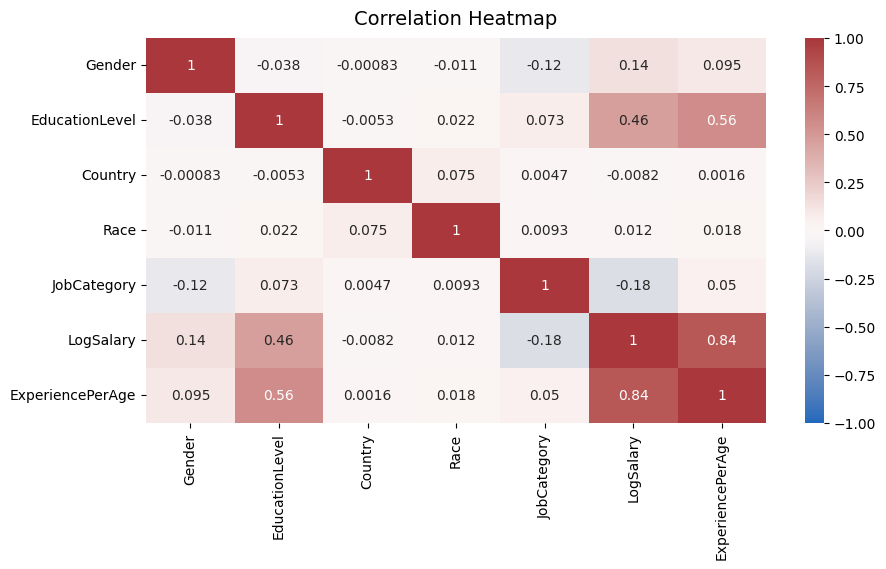

In [51]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 5))

cols =  data_encoded.drop(['Age', 'YearsOfExperience', 'Salary'], axis=1)
heatmap = sns.heatmap(
    data= cols.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

###**5. Model Building and Evaluation**
--------------------------------------------------------------------------------

####**5.1 Baseline Model**

#####**Linear Regression Model**

In [52]:
# split data into features (X) and target variable (y)
X = data_encoded.drop(['Salary', 'LogSalary', 'Age', 'YearsOfExperience'], axis=1)
y = data_encoded['LogSalary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

#define
y_pred = model.predict(X_test)

# Convert predictions to binary outcomes (e.g., 1 if salary > threshold, else 0)
threshold = y_test.median()
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Evaluate the model
# Calculate MSE (already done in your code)
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
lin_mean_cv_mse = -scores.mean()

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)



Mean Squared Error: 0.07731591013672766
Mean Absolute Error: 0.19421181995577247
R-squared: 0.7604603470283078
Adjusted R-squared: 0.7593821490404382


####**5.2 Comparison Models**

#####**5.2.1 Ridge Regression Model**

In [53]:
# Initialize the model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)         # Calculate R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
adjusted_r2_ridge = 1 - (1 - r2_ridge) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)  # Calculate Adjusted R-squared

# Cross-validation (Ridge)
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_mean_cv_mse = -scores.mean()

# Print the Results
print("Ridge Regression R-squared:", r2_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)
print("Ridge Regression Adjusted R-squared:", adjusted_r2_ridge)


Ridge Regression R-squared: 0.7601620968440648
Ridge Regression Mean Squared Error: 0.07741217597061832
Ridge Regression Mean Absolute Error: 0.194451546516415
Ridge Regression Adjusted R-squared: 0.7590825563947508


#####**5.2.2 Lasso Regression Model**

In [54]:
# Initialize the model
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred_lasso)       # Calculate R-squared
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
adjusted_r2_lasso = 1 - (1 - r2_lasso) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)    # Calculate Adjusted R-squared

# Cross-validation (Lasso)
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_mean_cv_mse = -scores.mean()

# Print the results
print("Lasso Regression R-squared:", r2_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Ridge Regression Mean Absolute Error:", mae_lasso)
print("Ridge Regression Adjusted R-squared:", adjusted_r2_lasso)


Lasso Regression R-squared: -0.0003182763907367825
Lasso Regression Mean Squared Error: 0.3228714620150689
Ridge Regression Mean Absolute Error: 0.46576234381900833
Ridge Regression Adjusted R-squared: -0.004820834273965957


#####**5.2.3 Decision Tree Regressor**

In [55]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Adjusted R-squared using cross-validation
adjusted_r2_dt = 1 - (1 - r2_dt) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Cross-validation
scores = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_squared_error')
dt_mean_cv_mse = -scores.mean()

# Print results
print("Decision Tree R-squared:", r2_dt)
print("Decision Tree Mean Squared Error:", mse_dt)
print("Decision Tree Mean Absolute Error:", mae_dt)
print("Decision Tree Adjusted R-squared:", adjusted_r2_dt)



Decision Tree R-squared: 0.8391248825009751
Decision Tree Mean Squared Error: 0.05192545774147888
Decision Tree Mean Absolute Error: 0.07327543261861812
Decision Tree Adjusted R-squared: 0.8384007634424648


#####**5.2.4 Random Forest Regressor**

In [56]:
import joblib
# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)     # Calculate R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1) # Calculate Adjusted R-squared

# Cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mean_cv_mse = -scores.mean()

# Print results
print("Random Forest R-squared:", r2_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest Adjusted R-squared:", adjusted_r2_rf)

# Save the model
joblib.dump(rf_model, 'rf_salary_model.joblib')

Random Forest R-squared: 0.8590222878683947
Random Forest Mean Squared Error: 0.04550319743402464
Random Forest Mean Absolute Error: 0.07896890651380825
Random Forest Adjusted R-squared: 0.8583877295242165


['rf_salary_model.joblib']

In [58]:
# Create a summary dataframe to compare models
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Decision Tree Regressor', 'Random Forest Regressor'],
    'Mean Squared Error': [mse, mse_ridge, mse_lasso, mse_dt, mse_rf],
    'Mean Absolute Error': [mae, mae_ridge, mae_lasso, mae_dt, mae_rf],
    'R-squared': [r2, r2_ridge, r2_lasso, r2_dt, r2_rf],
    'Adjusted R-squared': [adjusted_r2, adjusted_r2_ridge, adjusted_r2_lasso, adjusted_r2_dt, adjusted_r2_rf],
    'Cross-validation': [lin_mean_cv_mse,  ridge_mean_cv_mse, lasso_mean_cv_mse, dt_mean_cv_mse, rf_mean_cv_mse]
})

model_comparison

,Model,Mean Squared Error,Mean Absolute Error,R-squared,Adjusted R-squared,Cross-validation
0,Linear Regression,0.077316,0.194212,0.760460,0.759382,0.101662
1,Ridge Regression,0.077412,0.194452,0.760162,0.759083,0.101687
2,Lasso Regression,0.322871,0.465762,-0.000318,-0.004821,0.338872
3,Decision Tree Regressor,0.051925,0.073275,0.839125,0.838401,0.114685
4,Random Forest Regressor,0.045503,0.078969,0.859022,0.858388,0.088684


Based on the evaluation metrics, Random Forest Regressor Model appears to be the best choice for this dataset.


#####**5.2.6 Feature Analysis Distribution**

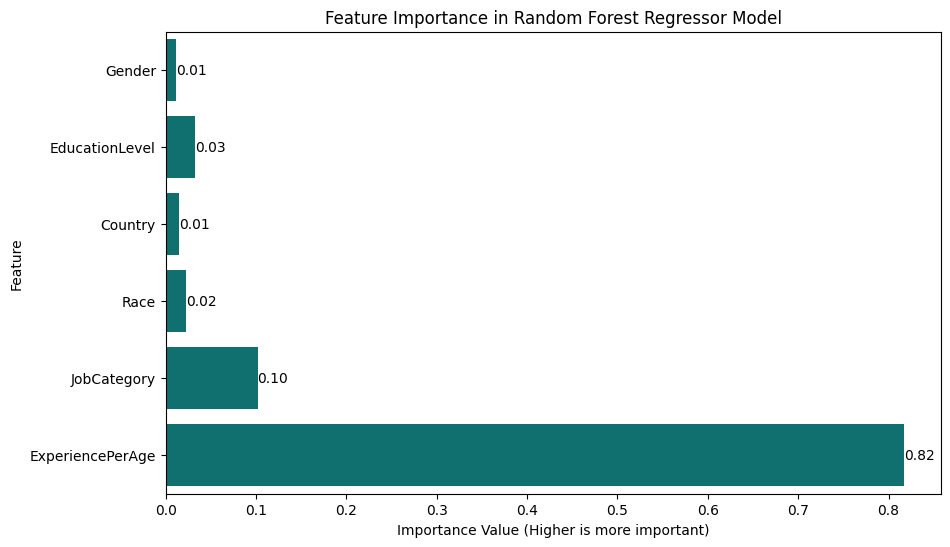

In [59]:
# Coefficients from Random Forest Regressor model
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#print(feature_importances_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='teal')  # Use Importance instead of Coefficient

for index, row in feature_importances_df.iterrows():
    plt.text(row['Importance'], index, f"{row['Importance']:.2f}", va="center")
plt.title('Feature Importance in Random Forest Regressor Model')
plt.xlabel('Importance Value (Higher is more important)')
plt.ylabel('Feature')
plt.show()

###**6. Model Deployment**

Create a streamlit app to interact with the model.